In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the the citipy module to determine city based on latitute and longitude.
from citipy import citipy

In [10]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

vaini to
sao filipe cv
beringovskiy ru
ribeira grande pt
arraial do cabo br
atuona pf
port shepstone za
doha kw
tsentralnyy ru
kapaa us
alexandria eg
jamestown sh
toulepleu ci
tevaitoa pf
kahului us
hobart au
hermanus za
yar-sale ru
kapuskasing ca
gizo sb
hobart au
albany au
airai pw
severo-kurilsk ru
singkang id
nikolskoye ru
kapaa us
la palma pa
ushuaia ar
puerto ayora ec
louisbourg ca
notre-dame-du-lac ca
taolanaro mg
saqqez ir
airai pw
albany au
nantucket us
esperance au
nanortalik gl
rikitea pf
kahului us
kodiak us
kapaa us
punta arenas cl
the pas ca
jamestown sh
clyde river ca
bluff nz
hilo us
kapit my
butaritari ki
samusu ws
soyo ao
castro cl
kaitangata nz
nikolskoye ru
salalah om
belushya guba ru
hobart au
hithadhoo mv
galveston us
rikitea pf
hilo us
taolanaro mg
kapaa us
upernavik gl
torbat-e jam ir
saint-philippe re
mys shmidta ru
alyangula au
tasiilaq gl
fortuna us
solnechnyy ru
minbu mm
tiksi ru
hermanus za
beloha mg
chuy uy
georgetown sh
ames us
touros br
jamestown sh
arra

balsas br
jamestown sh
carballo es
hermanus za
chyhyryn ua
novyy urengoy ru
hermanus za
homa bay ke
satitoa ws
beloha mg
pilao arcado br
novopavlovka ru
la ronge ca
avarua ck
pomuch mx
vaini to
kapaa us
busselton au
quatre cocos mu
luena ao
bluff nz
arraial do cabo br
milyutinskaya ru
jamestown sh
mahebourg mu
andenes no
lagdo cm
necochea ar
salgueiro br
rindal no
airai pw
georgetown sh
taolanaro mg
tuggurt dz
busselton au
akcakoca tr
thompson ca
vaini to
rikitea pf
albany au
poum nc
talnakh ru
barrow us
masuguru tz
ushuaia ar
atuona pf
hamilton bm
port elizabeth za
illoqqortoormiut gl
miguel hidalgo mx
belmonte br
dikson ru
hermanus za
vaini to
corinto ni
upernavik gl
kaitangata nz
merauke id
isangel vu
nikolskoye ru
shingu jp
kapaa us
jamestown sh
mosquera co
mataura pf
saint-augustin ca
longyearbyen sj
east london za
muros es
cape town za
hermanus za
albany au
port alfred za
moose factory ca
carthage us
albany au
punta arenas cl
busselton au
punta arenas cl
taolanaro mg
te anau nz
m

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2fd7ffc182ddfd5e5642b347899b66cc


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | beringovskiy
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | port shepstone
Processing Record 8 of Set 1 | doha
Processing Record 9 of Set 1 | tsentralnyy
City not found. Skipping...
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | alexandria
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | toulepleu
City not found. Skipping...
Processing Record 14 of Set 1 | tevaitoa
Processing Record 15 of Set 1 | kahului
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | yar-sale
Processing Record 19 of Set 1 | kapuskasing
Processing Record 20 of Set 1 | gizo
Processing Record 21 of Set 1 | albany
Processing Record 

City not found. Skipping...
Processing Record 36 of Set 4 | bud
Processing Record 37 of Set 4 | sabha
Processing Record 38 of Set 4 | yellowknife
Processing Record 39 of Set 4 | tlaltenango
Processing Record 40 of Set 4 | shirokiy
Processing Record 41 of Set 4 | lebu
Processing Record 42 of Set 4 | gazanjyk
Processing Record 43 of Set 4 | izalco
Processing Record 44 of Set 4 | artyk
City not found. Skipping...
Processing Record 45 of Set 4 | verkhoyansk
Processing Record 46 of Set 4 | lasa
Processing Record 47 of Set 4 | meru
Processing Record 48 of Set 4 | denpasar
Processing Record 49 of Set 4 | dehloran
Processing Record 50 of Set 4 | disraeli
Processing Record 1 of Set 5 | todos santos
Processing Record 2 of Set 5 | tabou
Processing Record 3 of Set 5 | male
Processing Record 4 of Set 5 | klaksvik
Processing Record 5 of Set 5 | hami
Processing Record 6 of Set 5 | ixtapa
Processing Record 7 of Set 5 | nouadhibou
Processing Record 8 of Set 5 | dolores
Processing Record 9 of Set 5 | ga

Processing Record 29 of Set 8 | rindal
Processing Record 30 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 31 of Set 8 | akcakoca
Processing Record 32 of Set 8 | poum
Processing Record 33 of Set 8 | masuguru
Processing Record 34 of Set 8 | hamilton
Processing Record 35 of Set 8 | miguel hidalgo
Processing Record 36 of Set 8 | belmonte
Processing Record 37 of Set 8 | corinto
Processing Record 38 of Set 8 | merauke
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | shingu
Processing Record 41 of Set 8 | mosquera
Processing Record 42 of Set 8 | saint-augustin
Processing Record 43 of Set 8 | muros
Processing Record 44 of Set 8 | moose factory
Processing Record 45 of Set 8 | carthage
Processing Record 46 of Set 8 | te anau
Processing Record 47 of Set 8 | manitouwadge
Processing Record 48 of Set 8 | novokayakent
Processing Record 49 of Set 8 | payo
Processing Record 50 of Set 8 | pisco
Processing Record 1 of Set 9 | igrim
Processing Record 2 of Set 9 | 

Processing Record 18 of Set 12 | halifax
Processing Record 19 of Set 12 | kangaatsiaq
Processing Record 20 of Set 12 | constitucion
Processing Record 21 of Set 12 | hilton head island
Processing Record 22 of Set 12 | clemson
Processing Record 23 of Set 12 | svetlaya
Processing Record 24 of Set 12 | chapleau
Processing Record 25 of Set 12 | hambantota
Processing Record 26 of Set 12 | san jeronimo
Processing Record 27 of Set 12 | chlorakas
Processing Record 28 of Set 12 | arganil
Processing Record 29 of Set 12 | taltal
Processing Record 30 of Set 12 | palmeiras de goias
Processing Record 31 of Set 12 | jega
Processing Record 32 of Set 12 | marang
Processing Record 33 of Set 12 | tomatlan
Processing Record 34 of Set 12 | hay river
Processing Record 35 of Set 12 | monrovia
Processing Record 36 of Set 12 | lugovskoy
Processing Record 37 of Set 12 | sabya
Processing Record 38 of Set 12 | palora
Processing Record 39 of Set 12 | ust-tsilma
Processing Record 40 of Set 12 | mogadishu
Processing 

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,84.20,70,75,5.75,TO,2021-03-14 22:49:11
1,Sao Filipe,14.8961,-24.4956,71.13,71,0,4.54,CV,2021-03-14 22:48:58
2,Beringovskiy,63.0500,179.3167,11.89,86,98,9.19,RU,2021-03-14 22:46:21
3,Ribeira Grande,38.5167,-28.7000,60.80,100,40,6.91,PT,2021-03-14 22:49:12
4,Arraial Do Cabo,-22.9661,-42.0278,77.81,83,14,15.82,BR,2021-03-14 22:49:12
5,Atuona,-9.8000,-139.0333,80.19,68,41,11.52,PF,2021-03-14 22:49:12
6,Port Shepstone,-30.7414,30.4550,74.68,88,67,12.46,ZA,2021-03-14 22:47:29
7,Doha,25.2867,51.5333,61.00,72,0,3.44,QA,2021-03-14 22:49:13
8,Kapaa,22.0752,-159.3190,73.40,78,75,23.02,US,2021-03-14 22:45:50
9,Alexandria,31.2156,29.9553,59.00,82,40,6.91,EG,2021-03-14 22:48:30


In [16]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-03-14 22:49:11,-21.2000,-175.2000,84.20,70,75,5.75
1,Sao Filipe,CV,2021-03-14 22:48:58,14.8961,-24.4956,71.13,71,0,4.54
2,Beringovskiy,RU,2021-03-14 22:46:21,63.0500,179.3167,11.89,86,98,9.19
3,Ribeira Grande,PT,2021-03-14 22:49:12,38.5167,-28.7000,60.80,100,40,6.91
4,Arraial Do Cabo,BR,2021-03-14 22:49:12,-22.9661,-42.0278,77.81,83,14,15.82
...,...,...,...,...,...,...,...,...,...
572,Luganville,VU,2021-03-14 22:52:47,-15.5333,167.1667,84.00,69,75,1.99
573,Pasni,PK,2021-03-14 22:52:47,25.2631,63.4710,73.22,77,0,7.40
574,Juneau,US,2021-03-14 22:52:24,58.3019,-134.4197,28.00,43,20,6.91
575,Dongsheng,CN,2021-03-14 22:52:48,39.8161,109.9776,23.88,24,20,25.37


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

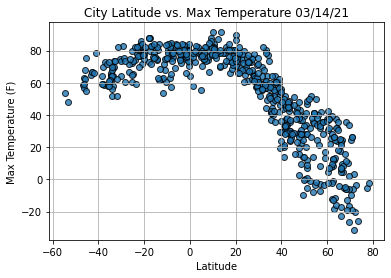

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

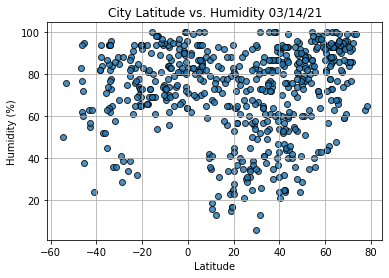

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

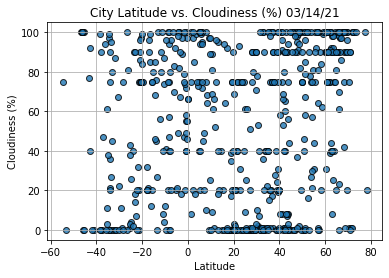

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

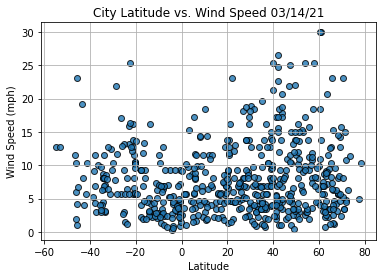

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

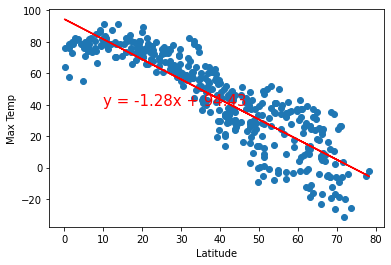

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,40))

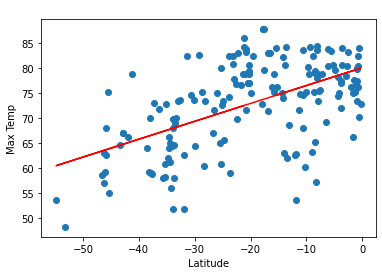

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

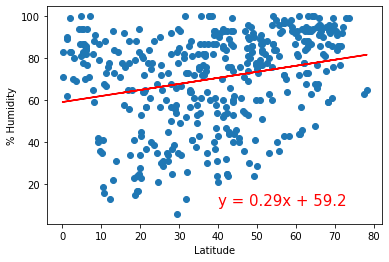

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

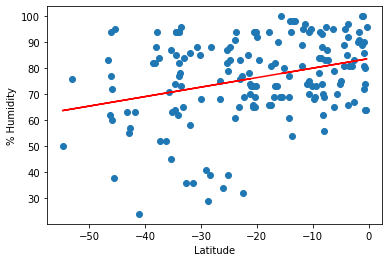

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

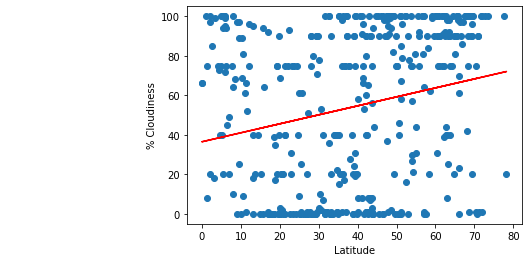

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

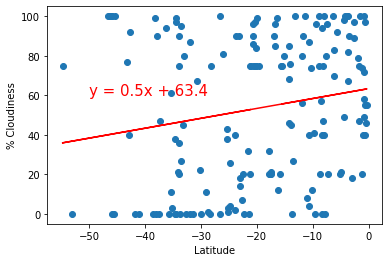

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

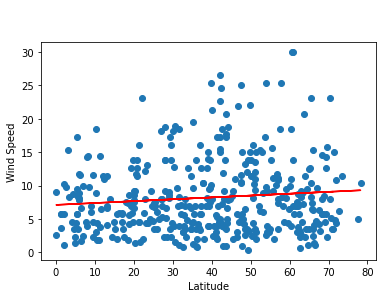

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

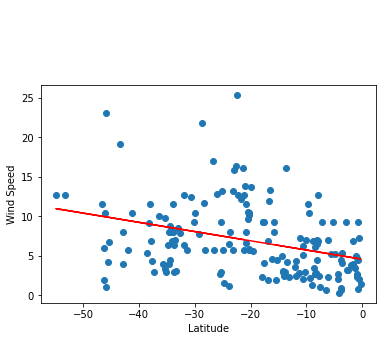

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))